In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import mlxtend
!pip install -q torchmetrics
import torchmetrics

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import random

from tqdm.auto import tqdm
from timeit import default_timer as timer

print(f"torch: {torch.__version__}")
print(f"torchvision: {torchvision.__version__}")
print(f"mlxtend: {mlxtend.__version__}")
print(f"torchmetrics: {torchmetrics.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.2 MB/s eta 0:00:00
torch: 2.1.0+cu118
torchvision: 0.16.0+cu118
mlxtend: 0.22.0
torchmetrics: 1.2.0


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
data_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()])

In [6]:
torch.manual_seed(318)
train_data = datasets.Food101(root = "data",
                              split = "train",
                              download = True,
                              transform = data_transform,
                              target_transform = None)
test_data = datasets.Food101(root = "data",
                             split = "test",
                             download = True,
                             transform = data_transform,
                             target_transform = None)

100%|██████████| 4996278331/4996278331 [03:55<00:00, 21250616.16it/s]


Extracting data/food-101.tar.gz to data


In [7]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

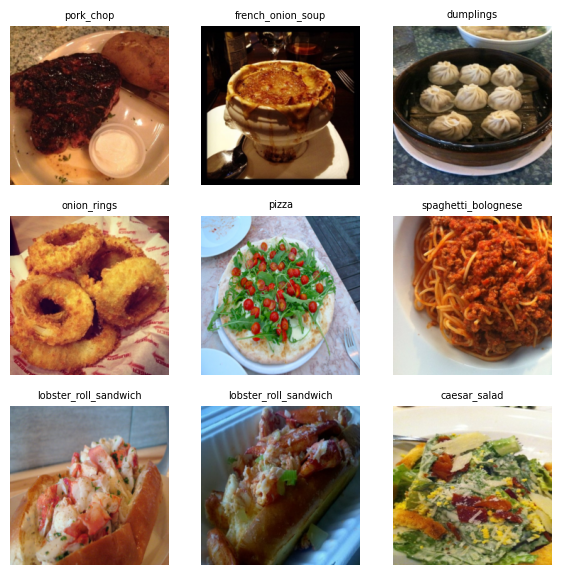

In [8]:
torch.manual_seed(318)
fig = plt.figure(figsize = (7,7))
rows, cols = 3,3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze().permute(1,2,0))
  plt.title(class_names[label], fontsize=7)
  plt.axis(False);

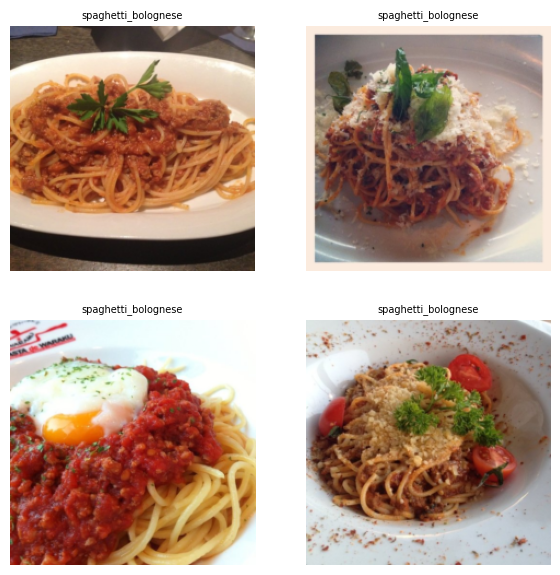

In [11]:
torch.manual_seed(318)
fig = plt.figure(figsize = (7,7))
rows, cols = 2,2
label_t = 90
for i in range(1, rows*cols+1):
  label = 0
  while label_t != label:
    random_idx = torch.randint(0, len(test_data), size=[1]).item()
    img, label = test_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze().permute(1,2,0))
  plt.title(class_names[label], fontsize=7)
  plt.axis(False);